<a href="https://colab.research.google.com/github/harshdarji23/YaayBnb/blob/master/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# package imports
#basics
import numpy as np
import pandas as pd

#viz
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 


#settings

color = sns.color_palette()
sns.set_style("dark")
pd.set_option('display.max_columns', None)

%matplotlib inline

From a local drive

In [109]:
from google.colab import files
uploaded = files.upload()

Saving neighbourhoods.geojson to neighbourhoods.geojson


In [0]:
airbnb=pd.read_csv('Airbnb_cleaned (1).csv',index_col=False)

In [0]:
# Data Exploration

In [0]:
airbnb.drop(['Unnamed: 0'],axis=1,inplace=True)

In [87]:
airbnb.head(2)

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,description,accommodates
0,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,10,48,0.39,1,1,"Beautiful, spacious skylit studio in the heart...",1
1,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,295,4.67,1,1,Urban retreat: enjoy 500 s.f. floor in 1899 br...,3


In [0]:
# NYC is an expensive city so let's check average price of a room here: 
# From below we see the average price of a room in NYC is $158

In [89]:
airbnb.describe().T

,count,mean,std,min,25%,50%,75%,max
id,49567.0,2.109428e+07,1.237033e+07,2595.00000,9.976678e+06,2.123326e+07,3.230379e+07,4.058402e+07
host_id,49567.0,7.773996e+07,9.027738e+07,2438.00000,8.715723e+06,3.487321e+07,1.265654e+08,3.143682e+08
latitude,49567.0,4.072880e+01,5.478862e-02,40.49979,4.068968e+01,4.072290e+01,4.076299e+01,4.091686e+01
longitude,49567.0,-7.395108e+01,4.724706e-02,-74.24787,-7.398298e+01,-7.395519e+01,-7.393470e+01,-7.371299e+01
price,49567.0,1.586312e+02,3.504252e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,49567.0,7.556096e+00,2.246559e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,49567.0,2.524226e+01,4.769319e+01,0.00000,1.000000e+00,6.000000e+00,2.600000e+01,6.750000e+02
reviews_per_month,49567.0,1.128748e+00,1.621305e+00,0.00000,4.000000e-02,3.800000e-01,1.670000e+00,5.263000e+01
calculated_host_listings_count,49567.0,7.433635e+00,3.308616e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.100000e+02
availability_365,49567.0,1.123160e+02,1.357825e+02,0.00000,0.000000e+00,4.000000e+01,2.250000e+02,3.650000e+02


In [0]:
# let's check correlation
# Most of the attributes are not correlated , but there's some correlation between num of reviews and reviews per month

In [91]:
airbnb.corr().style.background_gradient(cmap='RdPu')

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,accommodates
id,1,0.602526,-0.00594755,0.101455,0.0345468,0.00156325,-0.307695,0.200734,0.12141,0.138249,0.0622398
host_id,0.602526,1,0.0228575,0.134908,0.0510587,0.00934993,-0.138023,0.216283,0.114679,0.236287,0.0805806
latitude,-0.00594755,0.0228575,1,0.07784,0.0294507,0.02757,-0.0169044,-0.025287,0.0246043,-0.00525783,-0.0425596
longitude,0.101455,0.134908,0.07784,1,-0.112427,-0.055159,0.0628283,0.156035,-0.110518,0.0807909,-0.00407293
price,0.0345468,0.0510587,0.0294507,-0.112427,1,0.0275922,-0.0424997,-0.0422214,0.0240523,0.0653953,0.228167
minimum_nights,0.00156325,0.00934993,0.02757,-0.055159,0.0275922,1,-0.0890191,-0.134213,0.122909,0.151283,-0.0230043
number_of_reviews,-0.307695,-0.138023,-0.0169044,0.0628283,-0.0424997,-0.0890191,1,0.59832,-0.0766663,0.120903,0.0699851
reviews_per_month,0.200734,0.216283,-0.025287,0.156035,-0.0422214,-0.134213,0.59832,1,-0.0756437,0.15457,0.121583
calculated_host_listings_count,0.12141,0.114679,0.0246043,-0.110518,0.0240523,0.122909,-0.0766663,-0.0756437,1,0.227346,0.00484227
availability_365,0.138249,0.236287,-0.00525783,0.0807909,0.0653953,0.151283,0.120903,0.15457,0.227346,1,0.143181


In [0]:
# Manhattan is called heart of NYC so let's explore this neighborhood

Text(0.5, 1.0, 'Share of New York')

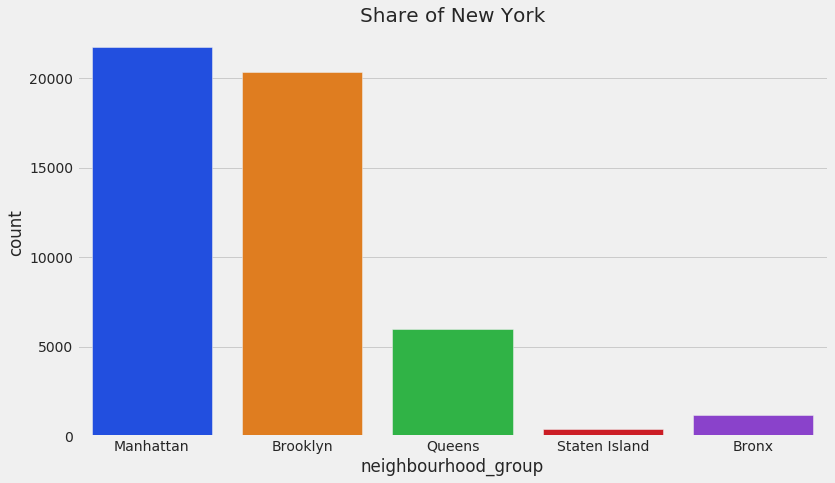

In [93]:
sns.countplot(airbnb['neighbourhood_group'], palette="bright")#hue=airbnb['neighbourhood_group'])
fig = plt.gcf()
fig.set_size_inches(12,7)
plt.title('Share of New York',fontsize=20)


In [0]:
# clearly, Manhattan and Brooklyn have more rentals, now let's visualize them on a map

In [0]:
import sys
#sys.setrecursionlimit(10000)
#to make the interactive maps
import folium
from folium.plugins import FastMarkerCluster
#import geopandas as gpd
#from branca.colormap import LinearColormap

In [96]:
lats =airbnb['latitude'].tolist()
lons = airbnb['longitude'].tolist()
locations = list(zip(lats, lons))

map1 = folium.Map(location=[40.7128,-74.0060], zoom_start=11)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [0]:
def generateBaseMap(default_location=[40.693943, -73.985880], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [98]:

from folium.plugins import HeatMap
df_copy = airbnb[['latitude','longitude']].copy()
df_copy['count'] = 1
base_map = generateBaseMap()
HeatMap(data=df_copy[['latitude', 'longitude', 'count']].values.tolist(), radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'yellow',1.0:'red'}, max_zoom=11).add_to(base_map)
base_map


In [0]:
# of course Manhattan has a lot of listings but it's expensive as well, let's check pricing for each neighborhood

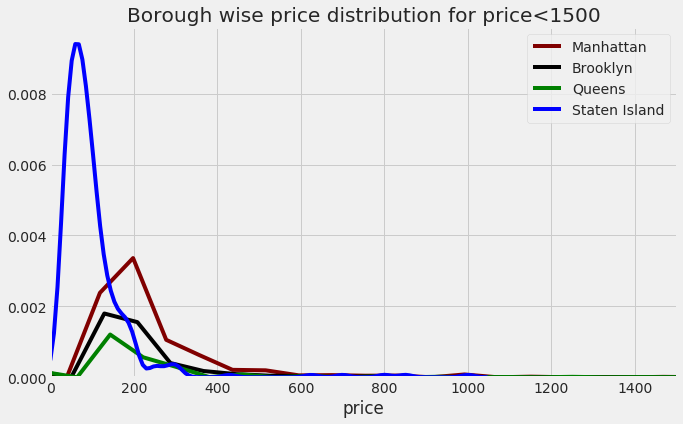

In [101]:
plt.figure(figsize=(10,6))
sns.distplot(airbnb[airbnb.neighbourhood_group=='Manhattan'].price,color='maroon',hist=False,label='Manhattan')
sns.distplot(airbnb[airbnb.neighbourhood_group=='Brooklyn'].price,color='black',hist=False,label='Brooklyn')
sns.distplot(airbnb[airbnb.neighbourhood_group=='Queens'].price,color='green',hist=False,label='Queens')
sns.distplot(airbnb[airbnb.neighbourhood_group=='Staten Island'].price,color='blue',hist=False,label='Staten Island')
sns.distplot(airbnb[airbnb.neighbourhood_group=='Long Island'].price,color='lavender',hist=False,label='Long Island')
plt.title('Borough wise price distribution for price<1500')
plt.xlim(0,1500)
plt.show()

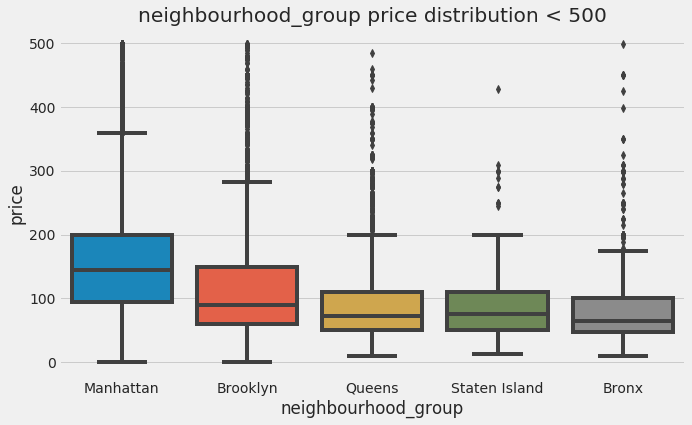

In [102]:
plt.style.use('fivethirtyeight')
ng = airbnb[airbnb.price <500]
plt.figure(figsize=(10,6))
sns.boxplot(y="price",x ='neighbourhood_group' ,data = ng)
plt.title("neighbourhood_group price distribution < 500")
plt.show()

In [0]:
feq = airbnb[airbnb['accommodates']==2]
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
#feq.plot.barh(figsize=(10, 8), color='b', width=1)
#plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
#plt.xlabel('Average daily price ($$)', fontsize=12)
#plt.ylabel("")
#plt.show()

In [137]:
pip install geopandas

  Using cached https://files.pythonhosted.org/packages/83/c5/3cf9cdc39a6f2552922f79915f36b45a95b71fd343cfc51170a5b6ddb6e8/geopandas-0.7.0-py2.py3-none-any.whl


In [116]:
pip install https://github.com/pyinstaller/pyinstaller/archive/develop.zip

     \ 22.2MB 19.3MB/s
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for PyInstaller: filename=PyInstaller-4.0.dev0+96897fc78d-cp36-none-any.whl size=2918691 sha256=872fd1aaf3846a90f92703e2d4979be4602a45e73d80b65a2aa5101e67514f44
  Stored in directory: /tmp/pip-ephem-wheel-cache-9fw8ouif/wheels/1e/5b/0a/b7b241e8886f8f6d4c41177dd91cdb275f0cda6cd9dde93269
Successfully built PyInstaller


In [138]:
import geopandas as gpd
from branca.colormap import LinearColormap

AttributeError: ignored

In [0]:
import json

In [127]:
adam = json.read_file("neighbourhoods.geojson")
feq = pd.DataFrame([feq])
feq = feq.transpose()
adam = pd.merge(adam, feq, on='neighbourhood', how='left')
adam.rename(columns={'price': 'average_price'}, inplace=True)
adam.average_price = adam.average_price.round(decimals=0)
map_dict = adam.set_index('neighbourhood')['average_price'].to_dict()
color_scale = LinearColormap(['yellow','red'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)
map3 = folium.Map(location=[40.693943, -73.985880], zoom_start=11)
folium.GeoJson(data=adam,
               name='New York',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
map3

AttributeError: ignored

In [0]:
# we have neighborhoods inside neighborhood group, let's explore them

In [0]:
airbnb.neighbourhood.value_counts()

Bedford-Stuyvesant            3904
Williamsburg                  3879
Harlem                        2700
Bushwick                      2449
Hell's Kitchen                2001
Upper West Side               1958
East Village                  1857
Upper East Side               1769
Crown Heights                 1600
Midtown                       1502
Chelsea                       1141
East Harlem                   1136
Greenpoint                    1095
Lower East Side                932
Washington Heights             927
Astoria                        917
West Village                   765
Financial District             729
Flatbush                       623
Clinton Hill                   576
Long Island City               546
Prospect-Lefferts Gardens      529
East Flatbush                  509
Murray Hill                    505
Park Slope                     501
Flushing                       491
Fort Greene                    477
Kips Bay                       442
Ridgewood           